## **Assignment 01**
Pick any non-trivial problem statement from your computational thinking course and ask genAI to solve it. Iterate upon its solution to apply our principles of clean code.

In [10]:
import random
from typing import List

def generate_dataset(size: int, structure: str) -> List[int]:
    if structure == 'random':
        return [random.randint(0, 1000) for _ in range(size)]
    elif structure == 'sorted':
        return list(range(size))
    elif structure == 'reverse_sorted':
        return list(range(size, 0, -1))

In [2]:
import time
from typing import List, Callable

def time_sorting_algorithm(algorithm: Callable[[List[int]], List[int]], dataset: List[int]) -> float:
    start_time = time.time()
    sorted_dataset = algorithm(dataset)
    end_time = time.time()
    return end_time - start_time

In [4]:
from typing import List

def insertion_sort(dataset: List[int]) -> List[int]:
    for i in range(1, len(dataset)):
        key = dataset[i]
        j = i - 1
        while j >= 0 and key < dataset[j]:
            dataset[j + 1] = dataset[j]
            j -= 1
        dataset[j + 1] = key
    return dataset

In [5]:
from typing import List

def quicksort(dataset: List[int]) -> List[int]:
    if len(dataset) <= 1:
        return dataset
    pivot = dataset[len(dataset) // 2]
    left = [x for x in dataset if x < pivot]
    middle = [x for x in dataset if x == pivot]
    right = [x for x in dataset if x > pivot]
    return quicksort(left) + middle + quicksort(right)

In [6]:
from typing import List

def merge(left: List[int], right: List[int]) -> List[int]:
    result = []
    while left and right:
        if left[0] <= right[0]:
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))
    while left:
        result.append(left.pop(0))
    while right:
        result.append(right.pop(0))
    return result

def mergesort(dataset: List[int]) -> List[int]:
    if len(dataset) <= 1:
        return dataset
    mid = len(dataset) // 2
    left = dataset[:mid]
    right = dataset[mid:]
    left = mergesort(left)
    right = mergesort(right)
    return merge(left, right)


In [7]:
from typing import List

def heapify(arr: List[int], n: int, i: int) -> None:
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapsort(dataset: List[int]) -> List[int]:
    n = len(dataset)
    for i in range(n // 2 - 1, -1, -1):
        heapify(dataset, n, i)
    for i in range(n - 1, 0, -1):
        dataset[i], dataset[0] = dataset[0], dataset[i]
        heapify(dataset, i, 0)
    return dataset


In [8]:
import matplotlib.pyplot as plt
from typing import List, Callable

def analyze_performance(algorithms: List[Callable], sizes: List[int], structures: List[str]) -> None:
    for algorithm in algorithms:
        for structure in structures:
            execution_times: List[float] = []
            for size in sizes:
                dataset = generate_dataset(size, structure)
                time_taken = time_sorting_algorithm(algorithm, dataset.copy())
                execution_times.append(time_taken)
            plt.plot(sizes, execution_times, label=f"{algorithm.__name__} ({structure} data)")
    plt.xlabel('Dataset Size')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithm Performance Analysis')
    plt.legend()
    plt.show()

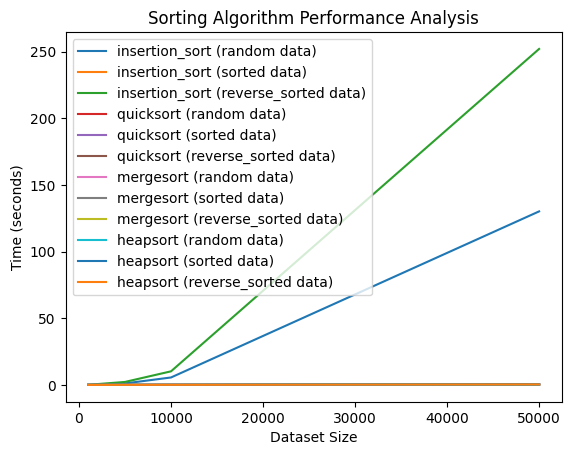

In [9]:
#Random Only

algorithms = [insertion_sort, quicksort, mergesort, heapsort]
sizes = [1000, 5000, 10000, 50000]
structures = ['random', 'sorted', 'reverse_sorted']

analyze_performance(algorithms, sizes, structures)

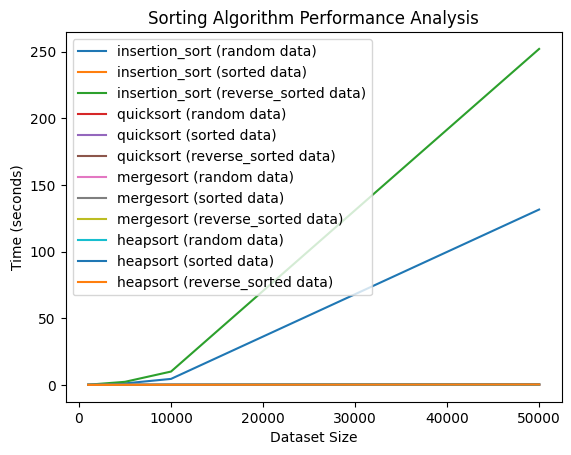

In [11]:

algorithms = [insertion_sort, quicksort, mergesort, heapsort]
sizes = [1000, 5000, 10000, 50000]
structures = ['random', 'sorted', 'reverse_sorted']

analyze_performance(algorithms, sizes, structures)